## [pyKNEEr](https://github.com/sbonaretti/pyKNEEr)

# [Preprocessing MR Knee Images](https://sbonaretti.github.io/pyKNEEr/preprocessing.html)
Content under Creative Commons Attribution license CC-BY-NC-SA 4.0   
Code under GNU-GPL v3 License  
© 2019 Serena Bonaretti
---

Preprocessing of MR images is fundamental to standardize spatial information and intensity of images

In the pipeline below:
- Steps 1-3 uniform image orientation, knee laterality, and image origin. The resulting image has the same intensity as the acquired `.dcm` image, but different collocation in space. It is saved as `_orig.mha`
- Steps 4-6 act on the intensities of the image, by correcting the inhomogeneous magnetic field, rescaling to a fixed range, and enhancing the cartilage contours [1]. The resulting image has different intensity than the acquired `.dcm` image, and it is used for atlas-based segmentation. It is saved as `_prep.mha`. These steps are computationally expensive, so if not needed, avoid them by setting `intensity_standardization` to zero (see below) 

---

*Automatic data download for the reproducibility of this notebook:*
- Download input images from Zenodo and image file list from GitHub:

In [ ]:
import os
import wget
from zipfile import ZipFile 

In [ ]:
# local folder  
local_folder_name  = "./inHouse/"
# Zenodo variables
input_URL          = "https://zenodo.org/record/2583184/files/"
zipped_folder_name = "inHouse_original.zip" 
# GitHub variables
raw_url            = "https://raw.githubusercontent.com/sbonaretti/pyKNEEr/master/publication/data/"
input_file_name    = "image_list_preprocessing_inHouse_spatial.txt"

In [ ]:
# create local folder for dataset
if not os.path.isdir(local_folder_name):
    os.mkdir(local_folder_name)
    print ("folder " + local_folder_name + " created")

In [ ]:
# download zipped folder from Zenodo
wget.download(input_URL + zipped_folder_name, local_folder_name + zipped_folder_name) 

In [ ]:
# unzip folder
with ZipFile(local_folder_name + zipped_folder_name, 'r') as zip: 
    zip.extractall(local_folder_name) 

In [ ]:
# download input file from GitHub
wget.download(raw_url + input_file_name, "./" + input_file_name)

---

## Import packages

In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
from pykneer import pykneer_io           as io
from pykneer import preprocessing_for_nb as prep

## Image information

Inputs:   
- `input_file_name` contains the list of the images to be preprocessed 
- `nOfCores` is the number of cores used for computations (computations are parallelized for speed)
- `intensity_standardization` is a flag that determines if the intensity standardization is performed (0=no, 1=yes)

In [3]:
# input_file_name           = "./image_list_preprocessing_inHouse_spatial.txt" # commented out because downloaded from GitHub
n_of_cores                = 4
intensity_standardization = 0

#### Read image data
- `imageData` is a dictionary (or struct), where each cell corresponds to an image. For each image, information such as paths and file names are stored  

In [4]:
image_data = io.load_image_data_preprocessing(input_file_name)

01_DESS_2
02_DESS_2
03_DESS_2
04_DESS_2
01_cubeQuant_2
02_cubeQuant_2
03_cubeQuant_2
04_cubeQuant_2
01_cubeQuant_3
02_cubeQuant_3
03_cubeQuant_3
04_cubeQuant_3
01_cubeQuant_4
02_cubeQuant_4
03_cubeQuant_4
04_cubeQuant_4
-> information loaded for 16 subjects


## Spatial standardization

#### Step 0: Read the dicom images

In [5]:
prep.read_dicom_stack(image_data, n_of_cores)

-> 01_DESS_2
Size:      512   512   68
Spacing:   0.31 0.31 1.50
Origin:    -4.94 -57.96 86.40
Direction: 
-0.00 0.00 -1.00 
1.00 0.00 0.00 
0.00 -1.00 0.00
-> 01_cubeQuant_3
Size:      512   512   68
Spacing:   0.31 0.31 1.50
Origin:    -5.69 -57.96 86.40
Direction: 
-0.00 0.00 -1.00 
1.00 0.00 0.00 
0.00 -1.00 0.00
-> 01_cubeQuant_2
Size:      512   512   68
Spacing:   0.31 0.31 1.50
Origin:    -5.69 -57.96 86.40
Direction: 
-0.00 0.00 -1.00 
1.00 0.00 0.00 
0.00 -1.00 0.00
-> 02_cubeQuant_2
Size:      512   512   72
Spacing:   0.31 0.31 1.50
-> 02_cubeQuant_3
Origin:    64.77 -39.91 71.86
Size:      512   512   72
Direction: 
-0.00 0.00 -1.00 
1.00 0.00 0.00 
0.00 -1.00 0.00Spacing:   0.31 0.31 1.50

Origin:    64.77 -39.91 71.86
Direction: 
-0.00 0.00 -1.00 
1.00 0.00 0.00 
0.00 -1.00 0.00
-> 04_cubeQuant_2
Size:      512   512   80
Spacing:   0.31 0.31 1.50
Origin:    -31.65 -59.72 63.98
Direction: 
-0.00 0.00 -1.00 
1.00 0.00 0.00 
0.00 -1.00 0.00
-> 02_DESS_2
Size:      512   51

#####   Save image header
The image header of the first slice of the dicom stack is saved in a `.txt` file. This can be useful to extract information such as subject's date of birth, exam date, etc.

In [6]:
prep.print_dicom_header(image_data, n_of_cores)

-> Dicom headers written
-> The total time was 1.06 seconds (about 0 min)


#### Step 1: Change orientation to RAI 
All images are oriented to the RAI (right, anterior, inferior) orientation

In [7]:
prep.orientation_to_rai(image_data, n_of_cores)

-> Image orientation changed
-> The total time was 61.40 seconds (about 1 min)


#### Step 2: Change laterality if knee is right
Right knees are flipped to left knees to have the same laterality 

In [8]:
prep.flip_rl(image_data, n_of_cores)

-> Image laterality changed for right images
-> The total time was 62.97 seconds (about 1 min)


#### 3. Set image origin to (0,0,0)
All images are set to the origin (0,0,0). Images are saved as *_orig.mha and they are anonymized

In [9]:
prep.origin_to_zero(image_data, n_of_cores)

-> Image origin changed
-> _orig.mha images saved
-> The total time was 118.15 seconds (about 1 min)


#### 4. Correct magnetic field inhomogeneities
Magnetic fields inhomogeneities create grey shades on images. This correction removes these shades. This is the longest step of the processing. It can take up to 15-20 min on a standard PC or laptop

In [10]:
if intensity_standardization == 1:
    prep.field_correction(image_data, n_of_cores) # add "#" in front of the command if intensity standardization is not needed

#### 5. Rescale intensities to [0 100]
Intensies are rescaled to the fixed range [0,100] to obtain homogeneous intensity range across images

In [11]:
if intensity_standardization == 1:
    prep.rescale_to_range(image_data, n_of_cores) # add "#" in front of the command if intensity standardization is not needed

#### 6. Edge preserving smoothing
Cartilage contours are enhanced using a curvature anisotropic diffusion filter

In [12]:
if intensity_standardization == 1:
    prep.edge_preserving_smoothing(image_data, n_of_cores) # add "#" in front of the command if intensity standardization is not needed

## Visualize original and preprocessed image
Each row corresponds to one image. Left: Original image after spatial preprocessing (steps 1-3). Right: Preprocessed image after intensities correction (steps 4-6). 
Note: A total black rendering of an original image is caused by very large intensity distribution

<Figure size 576x4608 with 0 Axes>

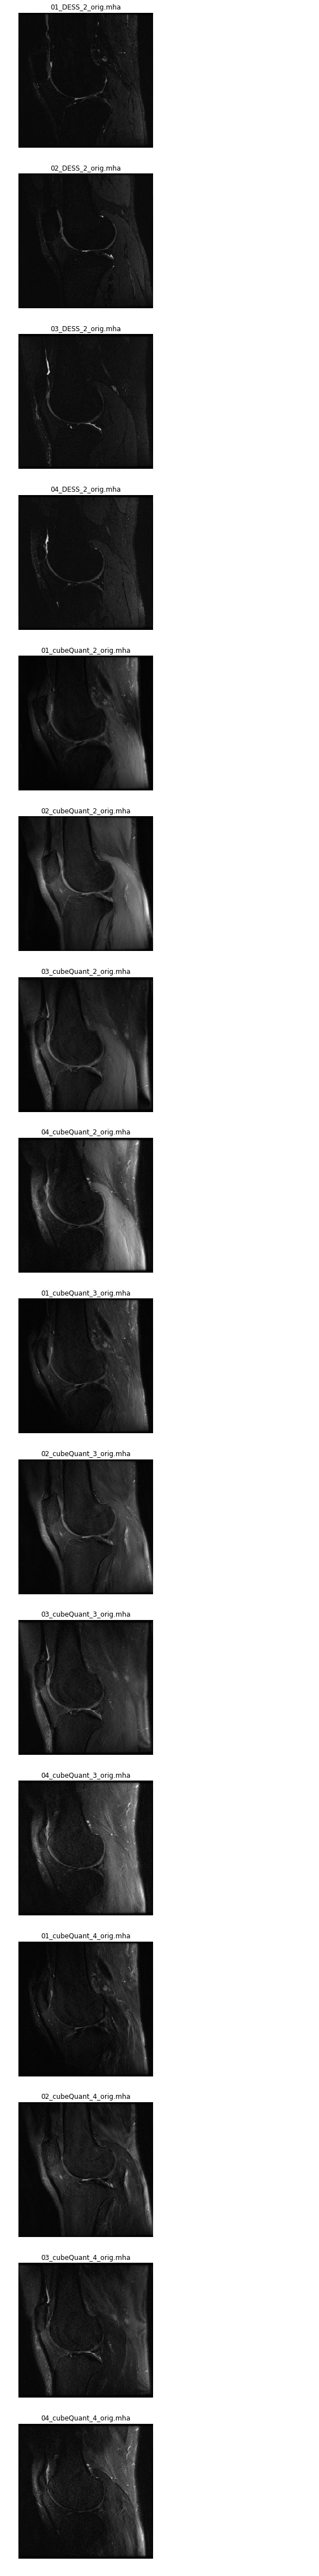

In [13]:
prep.show_preprocessed_images(image_data, intensity_standardization)

### References

[1] Shan L., Zach C., Charles C., Niethammer M. [*Automatic Atlas-Based Three-Label Cartilage Segmentation from MR Knee Images.*](https://www.ncbi.nlm.nih.gov/pubmed/25128683) Med Image Anal. Oct;18(7):1233-46. 2014.

### Dependencies

In [14]:
%load_ext watermark
%watermark -v -m -p SimpleITK,ikt,numpy,matplotlib,multiprocessing

CPython 3.7.0
IPython 6.5.0

SimpleITK unknown
ikt not installed
numpy 1.15.1
matplotlib 2.2.3
multiprocessing unknown

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.7.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


In [25]:
import wget
from zipfile import ZipFile 
import os

input_URL          = "https://zenodo.org/record/2583184/files/"
zipped_folder_name = "inHouse_original.zip" 
local_folder_name  = "./inHouse/" 

In [26]:
# create inHouse folder
if not os.path.isdir(local_folder_name):
    os.mkdir(local_folder_name)
    print ("folder " + local_folder_name + " created")

folder ./inHouse/ created


In [27]:
# download folder from Zenodo
wget.download(input_URL + zipped_folder_name, local_folder_name + zipped_folder_name)  

'./inHouse/inHouse_original.zip'

In [28]:
# unzip folder
with ZipFile(local_folder_name + zipped_folder_name, 'r') as zip: 
    zip.extractall("./") 

In [ ]:
# download input file from GitHub
raw_url         = "https://raw.githubusercontent.com/sbonaretti/pyKNEEr/master/publication/data/"
input_file_name = "image_list_preprocessing_inHouse_spatial.txt"
wget.download(raw_url + input_file_name, local_folder_name + input_file_name)